## Assignment 1 - Deep Learning Fundamentals

In [1]:
import pandas as pd
from sklearn.datasets import load_svmlight_file

# Read pre-processed data from file
X, y = load_svmlight_file('diabetes_scale.txt')

# Convert into a dense numpy array
X_dense = X.toarray()

# Create a pandas DataFrame
data = pd.DataFrame(X_dense, columns=[f'Feature_{i}' for i in range(X_dense.shape[1])])

# Named 'Label' column for the class labels, and changed labels with value of -1 to 0
data['Label'] = y
data['Label'] = data['Label'].replace(-1,0)
data

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Label
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,0.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,0.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0.0
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1.0
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1.0
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1.0
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,0.0


In [2]:
# Split the data into training, validation and testing sets:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(data.drop('Label', axis=1), data['Label'], test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2)
 

In [3]:
# Deep Learning imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Define some key parameters
hiddensizes = [16,32,64,128]
actfn = "relu"
# Optimiser and learning rate
opt_ins = keras.optimizers.Adam
learningrate = 0.001   
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50
 

In [4]:
# Build Perceptron model (using dense layers)
def perceptron(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(8, activation = actfn))
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

def implement(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size):
    model = perceptron(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

def plot_history(history):
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 
    

In [5]:
# Training
val_acc, history, model_trained = implement(hiddensizes, actfn, opt_ins, learningrate, n_epochs, batch_size)
print("Best accuracy: ", val_acc)
 

Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 0.6727 - accuracy: 0.6375 - val_loss: 0.6469 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6456 - val_loss: 0.6230 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6456 - val_loss: 0.6005 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6578 - val_loss: 0.5737 - val_accuracy: 0.6585
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6843 - val_loss: 0.5625 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.6904 - val_loss: 0.5495 - val_accuracy: 0.6748
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7189 - val_loss: 0.5395 - val_accuracy: 0.6748
Epoch 8/50
16/16 [==

Epoch 1/50
16/16 [==============================] - 0s 6ms/step - loss: 0.7015 - accuracy: 0.3971 - val_loss: 0.6905 - val_accuracy: 0.6585
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6701 - val_loss: 0.6651 - val_accuracy: 0.6504
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6558 - val_loss: 0.6441 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6538 - val_loss: 0.6268 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6477 - val_loss: 0.6147 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6456 - val_loss: 0.6073 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6456 - val_loss: 0.6007 - val_accuracy: 0.6585
Epoch 8/50
16/16 [==

16/16 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7332 - val_loss: 0.5223 - val_accuracy: 0.7561
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7597 - val_loss: 0.5129 - val_accuracy: 0.7561
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7597 - val_loss: 0.5066 - val_accuracy: 0.7561
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7413 - val_loss: 0.5034 - val_accuracy: 0.7561
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7658 - val_loss: 0.5002 - val_accuracy: 0.7561
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7617 - val_loss: 0.4969 - val_accuracy: 0.7642
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7678 - val_loss: 0.4948 - val_accuracy: 0.7642
Epoch 16/50
16/16 [======

16/16 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7637 - val_loss: 0.4761 - val_accuracy: 0.7724
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7760 - val_loss: 0.4772 - val_accuracy: 0.8049
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7617 - val_loss: 0.4800 - val_accuracy: 0.8049
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7739 - val_loss: 0.4782 - val_accuracy: 0.7886
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7739 - val_loss: 0.4804 - val_accuracy: 0.7967
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7821 - val_loss: 0.4792 - val_accuracy: 0.7805
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7780 - val_loss: 0.4833 - val_accuracy: 0.7967
Epoch 24/50
16/16 [======

16/16 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7841 - val_loss: 0.5169 - val_accuracy: 0.7724
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7862 - val_loss: 0.5179 - val_accuracy: 0.7886
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7984 - val_loss: 0.5101 - val_accuracy: 0.7805
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7902 - val_loss: 0.5161 - val_accuracy: 0.7805
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7984 - val_loss: 0.5283 - val_accuracy: 0.7642
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7923 - val_loss: 0.5100 - val_accuracy: 0.7724
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7963 - val_loss: 0.5134 - val_accuracy: 0.7805
Epoch 32/50
16/16 [======

Text(0, 0.5, 'Val Accuracy')

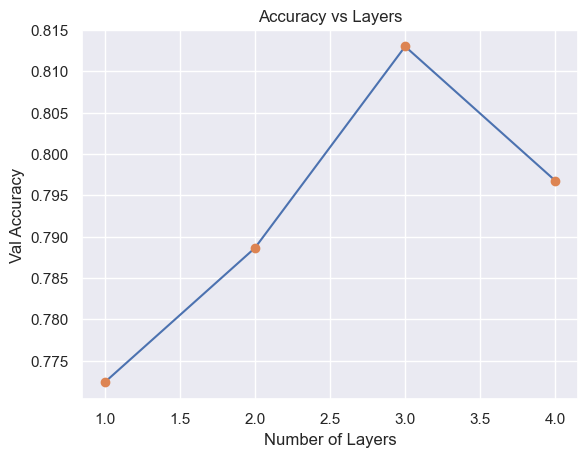

In [6]:
# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()
res = []
for n in [1,2,3,4]:
    valacc, history, discard = implement(hiddensizes[:n], actfn, opt_ins, learningrate, n_epochs, batch_size)
    res += [[n,valacc]]

print('Model perfomance of different number of hidden layers:')
print(res)
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')
 

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 44673.2617 - accuracy: 0.5112 - val_loss: 2.5765 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 3.9822 - accuracy: 0.5499 - val_loss: 2.2188 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 3.0800 - accuracy: 0.5336 - val_loss: 1.0001 - val_accuracy: 0.3333
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.6253 - val_loss: 0.6466 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.5356 - val_loss: 0.7821 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.5153 - val_loss: 1.3304 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.5397 - val_loss: 0.7520 - val_accuracy: 0.3333
Epoch 8/50
16/16

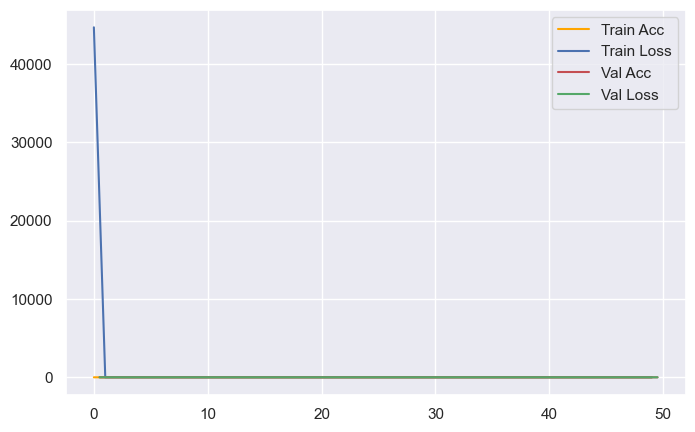

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 1.0237 - accuracy: 0.5764 - val_loss: 0.6893 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6456 - val_loss: 0.6411 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6456 - val_loss: 0.6372 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6456 - val_loss: 0.6377 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6456 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6456 - val_loss: 0.6385 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6456 - val_loss: 0.6390 - val_accuracy: 0.6667
Epoch 8/50
16/16 [==

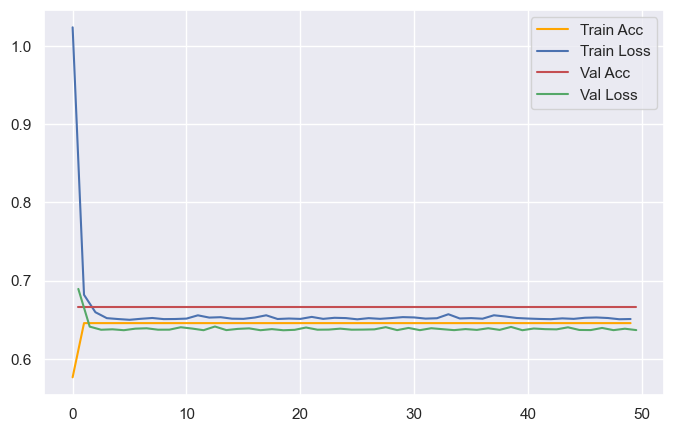

Epoch 1/50
16/16 [==============================] - 1s 8ms/step - loss: 0.6394 - accuracy: 0.6253 - val_loss: 0.5251 - val_accuracy: 0.7642
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.6986 - val_loss: 0.4731 - val_accuracy: 0.7967
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7006 - val_loss: 0.4717 - val_accuracy: 0.7886
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7536 - val_loss: 0.4578 - val_accuracy: 0.7886
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7413 - val_loss: 0.4870 - val_accuracy: 0.7805
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7536 - val_loss: 0.4822 - val_accuracy: 0.7967
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7556 - val_loss: 0.4353 - val_accuracy: 0.8049
Epoch 8/50
16/16 [==

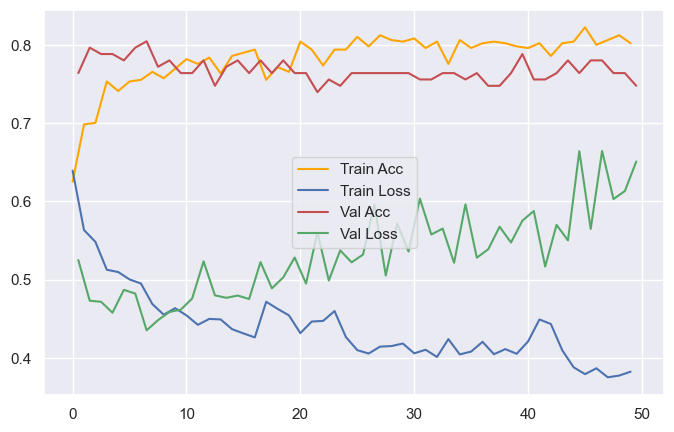

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 0.6823 - accuracy: 0.6130 - val_loss: 0.6611 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6456 - val_loss: 0.6308 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6456 - val_loss: 0.5976 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6823 - val_loss: 0.5529 - val_accuracy: 0.7642
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7088 - val_loss: 0.5196 - val_accuracy: 0.7886
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7373 - val_loss: 0.4978 - val_accuracy: 0.7886
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7536 - val_loss: 0.4819 - val_accuracy: 0.7724
Epoch 8/50
16/16 [==

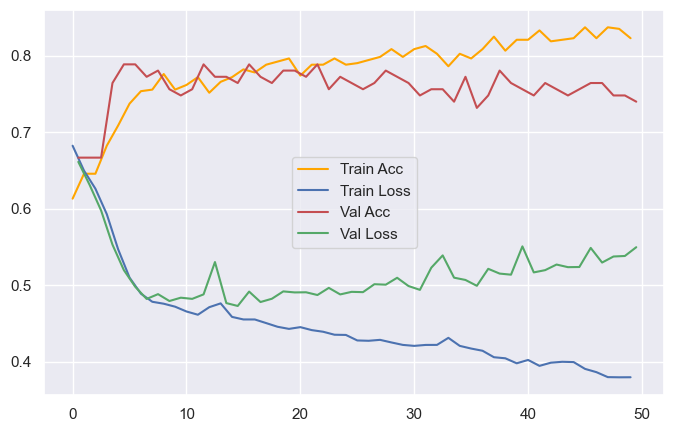

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 0.6984 - accuracy: 0.3666 - val_loss: 0.6941 - val_accuracy: 0.3740
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5866 - val_loss: 0.6862 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6456 - val_loss: 0.6790 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6456 - val_loss: 0.6718 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6456 - val_loss: 0.6639 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6456 - val_loss: 0.6569 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6456 - val_loss: 0.6490 - val_accuracy: 0.6667
Epoch 8/50
16/16 [==

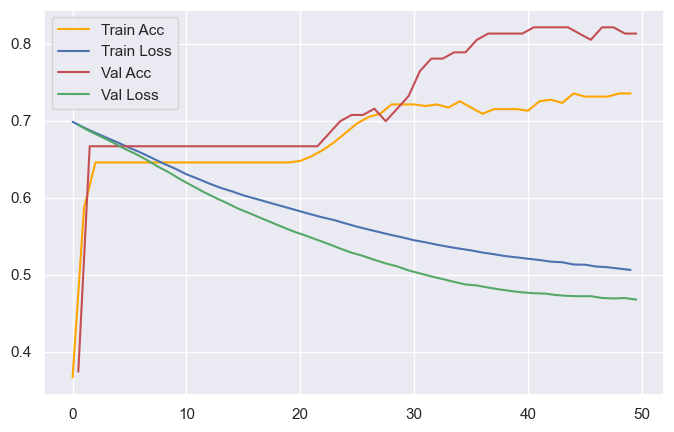

[[1, 0.6666666865348816], [0.1, 0.6666666865348816], [0.01, 0.8048780560493469], [0.001, 0.7886179089546204], [0.0001, 0.8211382031440735]]


In [7]:
# Learning rate
res=[]
for lr in [1,0.1, 0.01,0.001,0.0001]:
    valacc, history, discard = implement(hiddensizes, actfn, opt_ins, lr, n_epochs, batch_size)
    plot_history(history)
    res += [[lr,valacc]]
print(res)
    

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 0.6926 - accuracy: 0.5764 - val_loss: 0.6923 - val_accuracy: 0.5935
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5967 - val_loss: 0.6914 - val_accuracy: 0.6341
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6517 - val_loss: 0.6906 - val_accuracy: 0.6585
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.6538 - val_loss: 0.6897 - val_accuracy: 0.6585
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6456 - val_loss: 0.6888 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6456 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6477 - val_loss: 0.6872 - val_accuracy: 0.6667
Epoch 8/50
16/16 [=

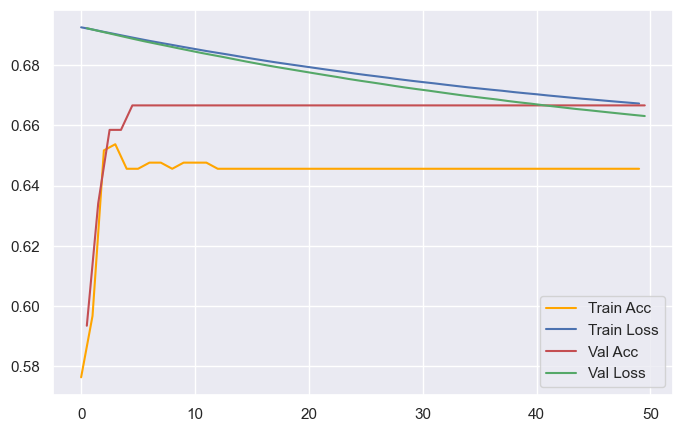

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 0.6493 - accuracy: 0.6456 - val_loss: 0.5977 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6456 - val_loss: 0.5666 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.6640 - val_loss: 0.5477 - val_accuracy: 0.7398
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7210 - val_loss: 0.5310 - val_accuracy: 0.7561
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7352 - val_loss: 0.5228 - val_accuracy: 0.7642
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7495 - val_loss: 0.5202 - val_accuracy: 0.7642
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7556 - val_loss: 0.5135 - val_accuracy: 0.7642
Epoch 8/50
16/16 [==

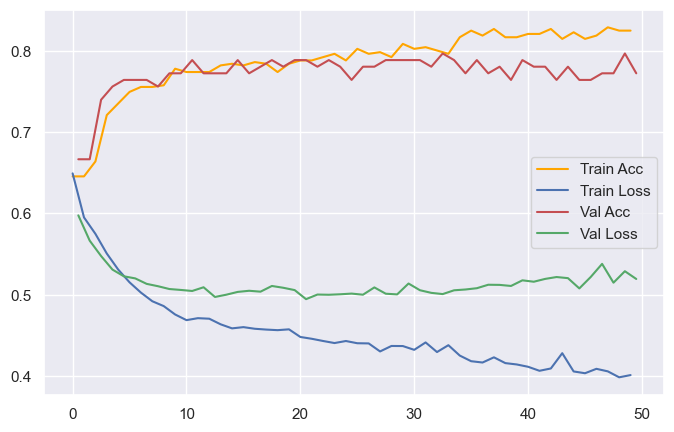

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6347 - accuracy: 0.6477 - val_loss: 0.5767 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6477 - val_loss: 0.5434 - val_accuracy: 0.6504
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6497 - val_loss: 0.5211 - val_accuracy: 0.7642
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7108 - val_loss: 0.4976 - val_accuracy: 0.7967
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7149 - val_loss: 0.5005 - val_accuracy: 0.7317
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7291 - val_loss: 0.4897 - val_accuracy: 0.7398
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7373 - val_loss: 0.4789 - val_accuracy: 0.8130
Epoch 8/50
16/16 [==

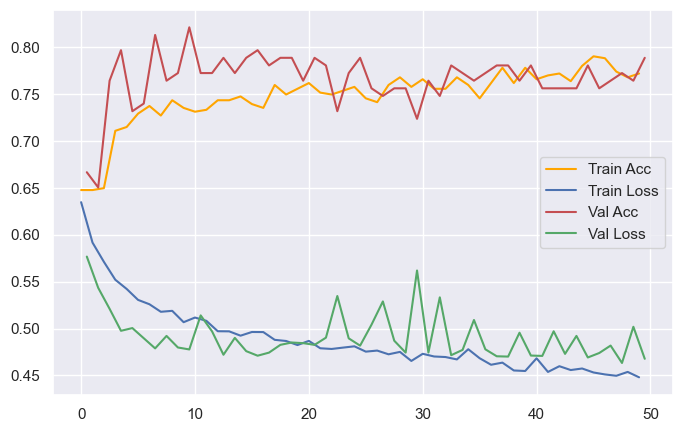

Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 0.6536 - accuracy: 0.6456 - val_loss: 0.5906 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.6456 - val_loss: 0.5414 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.6701 - val_loss: 0.5040 - val_accuracy: 0.7398
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7332 - val_loss: 0.4799 - val_accuracy: 0.7642
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7536 - val_loss: 0.4705 - val_accuracy: 0.7724
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7699 - val_loss: 0.4667 - val_accuracy: 0.7805
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7821 - val_loss: 0.4682 - val_accuracy: 0.7805
Epoch 8/50
16/16 [==

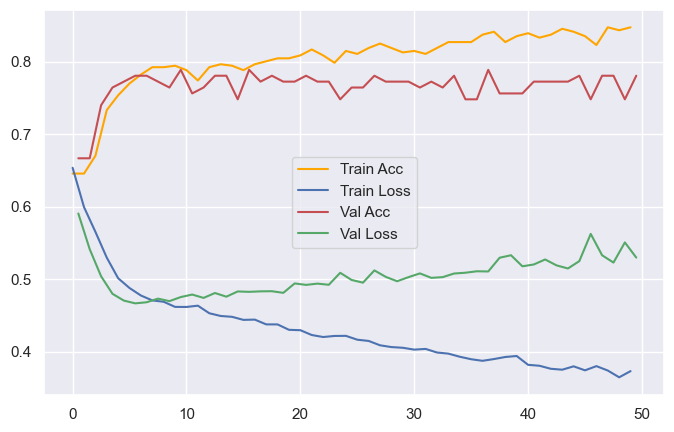

[[0.6666666865348816], [0.7967479825019836], [0.8211382031440735], [0.7886179089546204]]


In [8]:
res=[]
optimizer_setup = [[keras.optimizers.SGD,0.001], [keras.optimizers.Adam,0.001],[keras.optimizers.RMSprop, 0.001], [keras.optimizers.Nadam, 0.001]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = implement(hiddensizes, actfn, optimizer, lr, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]
print(res)
 

In [9]:
# final model
final_val_acc, final_history, final_model=implement(hiddensizes[:2], actfn, optimizer, 0.01, 100, batch_size)
scores = final_model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = final_model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
 

Epoch 1/100
16/16 [==============================] - 1s 7ms/step - loss: 0.6433 - accuracy: 0.6456 - val_loss: 0.5596 - val_accuracy: 0.6748
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7291 - val_loss: 0.5062 - val_accuracy: 0.7398
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7739 - val_loss: 0.4952 - val_accuracy: 0.7886
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7576 - val_loss: 0.4853 - val_accuracy: 0.8049
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7800 - val_loss: 0.4910 - val_accuracy: 0.7805
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7597 - val_loss: 0.5336 - val_accuracy: 0.7398
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7841 - val_loss: 0.4855 - val_accuracy: 0.7642
Epoch 8/100
1

Epoch 59/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8411 - val_loss: 0.6527 - val_accuracy: 0.7398
Epoch 60/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8473 - val_loss: 0.6814 - val_accuracy: 0.7317
Epoch 61/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8513 - val_loss: 0.6276 - val_accuracy: 0.7561
Epoch 62/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8371 - val_loss: 0.6208 - val_accuracy: 0.7317
Epoch 63/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8595 - val_loss: 0.6477 - val_accuracy: 0.7317
Epoch 64/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8534 - val_loss: 0.6648 - val_accuracy: 0.7073
Epoch 65/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8310 - val_loss: 0.6287 - val_accuracy: 0.7236
Epoch 

5/5 [==============================] - 0s 1ms/step


Text(47.25, 0.5, 'Actual')

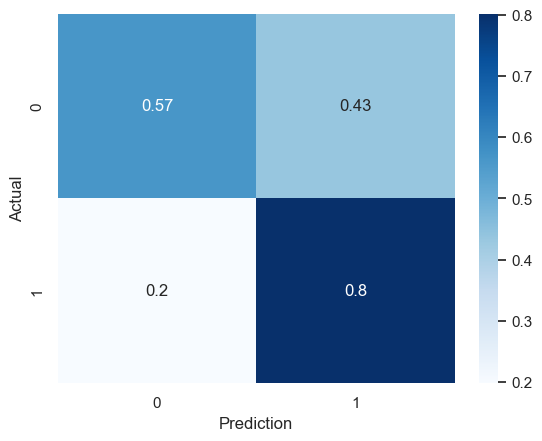

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = (final_model.predict(X_test)>0.5).astype(int)
c_mat = confusion_matrix(y_test, y_test_pred, normalize='true')
ax = sns.heatmap(c_mat, annot=True, 
                 cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
 

5/5 [==============================] - 0s 1000us/step


Text(0, 0.5, 'True Positive Rate')

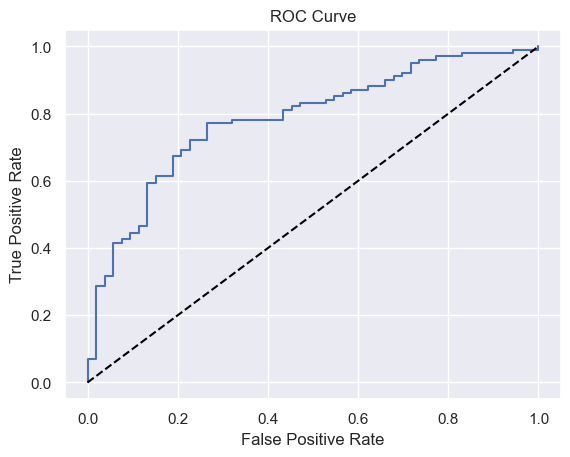

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = final_model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_test_pred_probs)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.785354007098823
